In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

C:\Users\rty67\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load the dataset
data = pd.read_csv('BTCprice.csv')

In [3]:
# Extract the 'Close' prices as our target variable
target = data['Close'].values

In [4]:
# Normalize the data to scale between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
target = scaler.fit_transform(target.reshape(-1, 1))

In [5]:
# Split the data into training and testing sets
train_size = int(len(target) * 0.8)
test_size = len(target) - train_size
train_data, test_data = target[0:train_size,:], target[train_size:len(target),:]

In [6]:
# Prepare the data for RNN
def create_sequences(dataset, seq_length):
    dataX, dataY = [], []
    for i in range(len(dataset) - seq_length):
        dataX.append(dataset[i:(i + seq_length)])
        dataY.append(dataset[i + seq_length])
    return np.array(dataX), np.array(dataY)

In [7]:
seq_length = 10  
trainX, trainY = create_sequences(train_data, seq_length)
testX, testY = create_sequences(test_data, seq_length)

In [8]:
# Build the RNN model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [9]:
# Train the model
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
1450/1450 - 2s - loss: 0.0025 - 2s/epoch - 1ms/step
Epoch 2/100
1450/1450 - 1s - loss: 7.0807e-04 - 1s/epoch - 865us/step
Epoch 3/100
1450/1450 - 1s - loss: 5.7851e-04 - 1s/epoch - 866us/step
Epoch 4/100
1450/1450 - 1s - loss: 4.5866e-04 - 1s/epoch - 866us/step
Epoch 5/100
1450/1450 - 1s - loss: 4.6667e-04 - 1s/epoch - 859us/step
Epoch 6/100
1450/1450 - 1s - loss: 4.8837e-04 - 1s/epoch - 863us/step
Epoch 7/100
1450/1450 - 1s - loss: 4.3243e-04 - 1s/epoch - 862us/step
Epoch 8/100
1450/1450 - 1s - loss: 4.4758e-04 - 1s/epoch - 858us/step
Epoch 9/100
1450/1450 - 1s - loss: 4.3267e-04 - 1s/epoch - 868us/step
Epoch 10/100
1450/1450 - 1s - loss: 4.2608e-04 - 1s/epoch - 864us/step
Epoch 11/100
1450/1450 - 1s - loss: 3.9093e-04 - 1s/epoch - 863us/step
Epoch 12/100
1450/1450 - 1s - loss: 3.7525e-04 - 1s/epoch - 864us/step
Epoch 13/100
1450/1450 - 1s - loss: 4.1491e-04 - 1s/epoch - 866us/step
Epoch 14/100
1450/1450 - 1s - loss: 3.9390e-04 - 1s/epoch - 884us/step
Epoch 15/100
1450/145

In [10]:
# Make predictions on the test set (January 2023 to May 2023)
test_predictions = model.predict(testX)

12/12 [==============================] - 0s 1ms/step


In [11]:
# Inverse transform the predictions to get the original scale
test_predictions = scaler.inverse_transform(test_predictions)

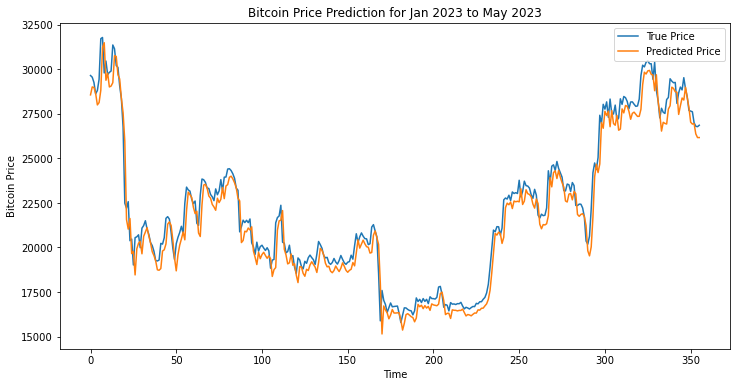

In [12]:
# Plot the results for the test set
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(testY), label='True Price')
plt.plot(test_predictions, label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.title('Bitcoin Price Prediction for Jan 2023 to May 2023')
plt.legend()
plt.show()

In [13]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

# Inverse transform the true prices to their original scale
true_prices = scaler.inverse_transform(testY)

# Calculate the MAPE
mape = mean_absolute_percentage_error(true_prices, test_predictions)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(true_prices, test_predictions))

print(f"Root Mean Squared Error (RMSE): {rmse}")
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))

Root Mean Squared Error (RMSE): 825.6104505370902
Mean Absolute Percentage Error (MAPE): 0.03%
